## Lecture 06 - Tree Model, CART, Random Forest

### Install packages 
```pip install pydotplus```

```pip install graphviz```

#### Mac Command line
``` brew install graphviz```

#### For windows

Install windows package from: https://graphviz.gitlab.io/_pages/Download/Download_windows.html

Install python graphviz package

Add C:\Program Files (x86)\Graphviz2.38\bin to User path

Add C:\Program Files (x86)\Graphviz2.38\bin\dot.exe to System Path


In [3]:
import pandas as pd
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import numpy as np

/home/dlai/Projects/Foundations_of_Analytics/demo/JupyterNotebook/analyticvenv/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### 1. Data Preprocessing

### 1.1 Load Data

In [4]:
car = pd.read_csv("Data/car.data", header=None)

In [5]:
car.columns=["buying", "maint", "doors", "persons", "lug_root", "safty", "class"] #Rename the columns

In [6]:
car.head(10)

,buying,maint,doors,persons,lug_root,safty,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [7]:
X=car[["buying", "maint", "doors", "persons", "lug_root", "safty"]]
y=car["class"]

In [8]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [9]:
ybin=y.copy()
ybin.loc[ybin!= "unacc"] = "acc" 

In [10]:
ybin.unique()

array(['unacc', 'acc'], dtype=object)

In [15]:
ysimp=pd.get_dummies(ybin)['acc']

### 1.2 One-hot encoding

In [12]:
buying_1hot = pd.get_dummies(X['buying'], prefix = 'buying')

In [13]:
maint_1hot = pd.get_dummies(X['maint'], prefix = 'maint')
doors_1hot = pd.get_dummies(X['doors'], prefix = 'doors')
persons_1hot = pd.get_dummies(X['persons'], prefix = 'persons')
lug_root_1hot = pd.get_dummies(X['lug_root'], prefix = 'lug_root')
safty_1hot = pd.get_dummies(X['safty'], prefix = 'safty')

In [14]:
X1hot=pd.concat([safty_1hot, maint_1hot, buying_1hot, doors_1hot, persons_1hot, lug_root_1hot], axis=1)
X1hot.head(10)

,safty_high,safty_low,safty_med,maint_high,maint_low,maint_med,maint_vhigh,buying_high,buying_low,buying_med,...,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_root_big,lug_root_med,lug_root_small
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
9,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


### 2.Build a Single Tree

In [17]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
# Train Decision Tree Classifer
clf = clf.fit(X1hot, ybin)

[Text(244.66153846153847, 199.32, 'X[15] <= 0.5\nentropy = 0.881\nsamples = 1728\nvalue = [518, 1210]'),
 Text(218.90769230769232, 163.07999999999998, 'X[1] <= 0.5\nentropy = 0.993\nsamples = 1152\nvalue = [518, 634]'),
 Text(193.15384615384616, 126.83999999999999, 'X[6] <= 0.5\nentropy = 0.91\nsamples = 768\nvalue = [518, 250]'),
 Text(103.01538461538462, 90.6, 'X[10] <= 0.5\nentropy = 0.77\nsamples = 576\nvalue = [446, 130]'),
 Text(51.50769230769231, 54.359999999999985, 'X[20] <= 0.5\nentropy = 0.569\nsamples = 432\nvalue = [374, 58]'),
 Text(25.753846153846155, 18.119999999999976, 'entropy = 0.25\nsamples = 288\nvalue = [276, 12]'),
 Text(77.26153846153846, 18.119999999999976, 'entropy = 0.904\nsamples = 144\nvalue = [98, 46]'),
 Text(154.52307692307693, 54.359999999999985, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 144\nvalue = [72, 72]'),
 Text(128.76923076923077, 18.119999999999976, 'entropy = 0.811\nsamples = 96\nvalue = [72, 24]'),
 Text(180.27692307692308, 18.119999999999976, 'en

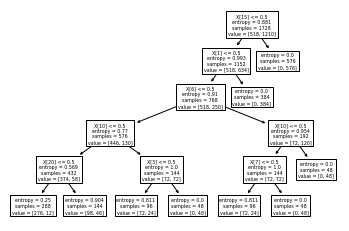

In [18]:
tree.plot_tree(clf)  

In [19]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X1hot.columns, class_names=['acc', 'unacc'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
graph.write_png('car.png')
Image(graph.create_png())

In [ ]:
np.sum(ybin[X1hot["safty_low"]==1]=="unacc")

### 3. Build From Scratch: Checking the First Split

### $H= \sum\limits_{i=1}^c p_i log(p_i)$

In [16]:
def entropy(y): #Define Function to Calculate Entropy
    p1 = float(y.sum())/float(len(y))+1e-20
    return -(p1*np.log2(p1)+(1-p1)*np.log2(1-p1))

In [17]:
entropy(ysimp)

0.8810077539356893

In [18]:
def Dentropy(data, y, splitter):  #Entropy Change after Splits
    yleft=y[data[splitter]<0.5]   #filter out the data points that goes to left
    yright=y[data[splitter]>=0.5] #filter the data points that goes to right
    H2=(len(yleft)*entropy(yleft)+len(yright)*entropy(yright))/float(len(yleft)+len(yright)) #Average Entropy after split
    H1=entropy(y) #Entropy before splits
    dH= H1-H2
    return (dH, entropy(yleft), entropy(yright))

In [19]:
feature_cols=list(X1hot.columns)
for i in feature_cols: # Try different variables at the first split
    print(i+": "+str(Dentropy(X1hot, ysimp, i)))

NameError: name 'X1hot' is not defined

In [ ]:
clf.predict(X1hot[0:1])

In [ ]:
clf.predict_proba(X1hot[100:101])

In [29]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=20)
# Train Decision Tree Classifer
clf = clf.fit(X1hot, ybin)

In [ ]:
clf.feature_importances_

### 4. Random Forest to Predict House Price

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
houseprice = pd.read_csv('Data/housetrain.csv')

In [22]:
houseprice.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
y = houseprice['SalePrice']
predictor_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

# Create training predictors data
train_X = houseprice[predictor_cols]

### 4.1 In Sample Model

In [24]:
rf = RandomForestRegressor(n_estimators = 1000, max_depth=None, random_state = 42)
# Train the model on training data
rf.fit(train_X, y);

In [25]:
rf.feature_importances_

array([0.19600376, 0.67895837, 0.02139612, 0.10364175])

In [26]:
houseprice['ypred']=rf.predict(train_X)

In [27]:
error=np.sqrt(np.dot((y-houseprice['ypred']), (y-houseprice['ypred'])))
print(error)

573590.4275752138


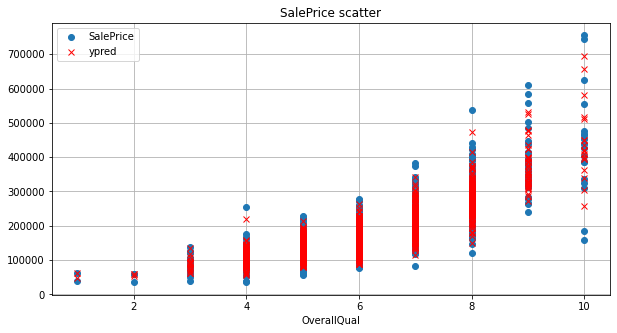

In [28]:
import matplotlib.pyplot as plt
houseprice.plot(x='OverallQual', y=['SalePrice', 'ypred'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('SalePrice scatter')
plt.show()

### 4.2 Cross Validation 

In [29]:
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
kf = KFold(n_splits=10)
houseprice_shuffle=shuffle(houseprice)

y_shuffle = houseprice_shuffle['SalePrice']
predictor_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
# Create training predictors data
train_X_shuffle = houseprice_shuffle[predictor_cols]

In [30]:
errorls=[]
for ntrees in [10, 50, 100, 500, 1000]:
    y_pred_cv= np.empty((0, 1))
    rf = RandomForestRegressor(n_estimators = ntrees, max_depth=None,min_samples_leaf=1)
    for train, test in kf.split(train_X_shuffle):
        rf_modelcv=rf.fit(train_X_shuffle.iloc[train], y_shuffle.iloc[train]);
        y_pred_cv=np.append(y_pred_cv,rf_modelcv.predict(train_X_shuffle.iloc[test]))
    errorls.append(np.sqrt(np.dot(y_pred_cv-y_shuffle, y_pred_cv-y_shuffle)/len(y_shuffle)))

In [31]:
houseprice_shuffle['y_pred_cv']=y_pred_cv
houseprice_shuffle['residual']=houseprice_shuffle['y_pred_cv']-houseprice_shuffle['SalePrice']

/home/dlai/Projects/Foundations_of_Analytics/demo/JupyterNotebook/analyticvenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dlai/Projects/Foundations_of_Analytics/demo/JupyterNotebook/analyticvenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


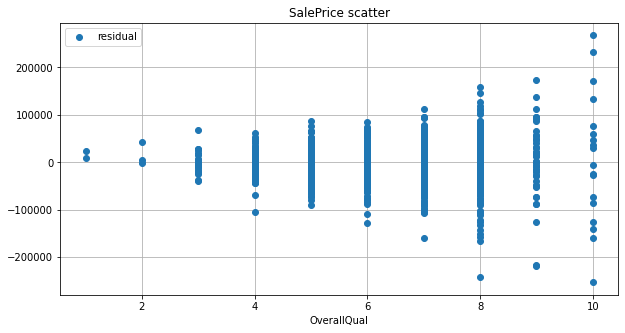

In [42]:
houseprice_shuffle.plot(x='OverallQual', y=['residual'], figsize=(10,5), grid=True, style=['o','rx'])
plt.title('SalePrice scatter')
plt.show()

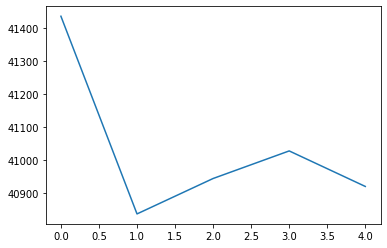

In [33]:
plt.plot(errorls)
plt.show()

In [ ]:
errorls